In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
# Load the CSV file
file_path = 'Resources/average_air_quality_health.csv'
data = pd.read_csv(file_path)

In [3]:
print(data.head())

        City Country  PM2.5  PM10  NO2     O3  SO2     CO  NH3  \
0  abbeville      FR    4.7   8.8  4.7   36.8  0.8  210.3  1.3   
1     acarau      BR    2.1   9.6  0.2   52.2  0.1  353.8  0.1   
2      agbor      NG   29.9  39.2  5.7    2.5  0.4  894.6  0.6   
3    al jawf      SA   11.1  39.2  1.0  101.6  1.7  193.6  0.5   
4  al qusayr      SY    7.9  10.0  4.7   40.8  2.5  210.3  2.7   

   MortalityRate_per_100k  
0                     4.1  
1                     9.6  
2                    29.6  
3                    33.5  
4                    26.6  


In [4]:
# Get basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   City                    398 non-null    object 
 1   Country                 398 non-null    object 
 2   PM2.5                   398 non-null    float64
 3   PM10                    398 non-null    float64
 4   NO2                     398 non-null    float64
 5   O3                      398 non-null    float64
 6   SO2                     398 non-null    float64
 7   CO                      398 non-null    float64
 8   NH3                     398 non-null    float64
 9   MortalityRate_per_100k  398 non-null    float64
dtypes: float64(8), object(2)
memory usage: 31.2+ KB
None


In [5]:
# Get basic statistics of numerical columns
print(data.describe())

            PM2.5        PM10         NO2          O3         SO2  \
count  398.000000  398.000000  398.000000  398.000000  398.000000   
mean     8.782915   17.507035    2.967085   50.314573    1.503518   
std     22.475258   42.845481    6.392155   24.763310    3.679097   
min      0.500000    0.500000    0.000000    0.000000    0.000000   
25%      0.900000    1.525000    0.300000   33.375000    0.100000   
50%      2.200000    4.750000    0.800000   51.150000    0.300000   
75%      5.675000   11.000000    2.575000   65.625000    0.900000   
max    343.200000  434.700000   66.500000  111.600000   31.000000   

                CO         NH3  MortalityRate_per_100k  
count   398.000000  398.000000              398.000000  
mean    293.982161    0.885176               14.348995  
std     292.729313    2.454258                9.567895  
min     161.900000    0.000000                3.200000  
25%     213.600000    0.000000                5.700000  
50%     230.300000    0.200000      

In [6]:
# Check for missing values in the dataset
print(data.isnull().sum())

City                      0
Country                   0
PM2.5                     0
PM10                      0
NO2                       0
O3                        0
SO2                       0
CO                        0
NH3                       0
MortalityRate_per_100k    0
dtype: int64


In [8]:
# Calculate mean, median, mode, variance, and standard deviation for PM2.5 column
mean_pm25 = data['PM2.5'].mean()
median_pm25 = data['PM2.5'].median()
mode_pm25 = data['PM2.5'].mode()[0] 
variance_pm25 = data['PM2.5'].var()
std_dev_pm25 = data['PM2.5'].std()

print(f"Mean PM2.5: {mean_pm25}, Median PM2.5: {median_pm25}, Mode PM2.5: {mode_pm25}, Variance PM2.5: {variance_pm25}, Standard Deviation PM2.5: {std_dev_pm25}")


Mean PM2.5: 8.782914572864321, Median PM2.5: 2.2, Mode PM2.5: 0.5, Variance PM2.5: 505.1372388390312, Standard Deviation PM2.5: 22.475258370907135


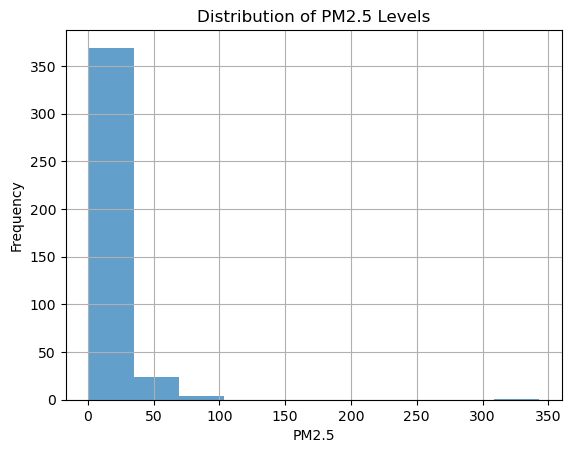

NormaltestResult(statistic=654.4194554072769, pvalue=7.845503730481972e-143)


In [7]:
# Plot a histogram for PM2.5
data['PM2.5'].hist(bins=10, alpha=0.7)
plt.title('Distribution of PM2.5 Levels')
plt.xlabel('PM2.5')
plt.ylabel('Frequency')
plt.show()
print(st.normaltest(data["PM2.5"]))

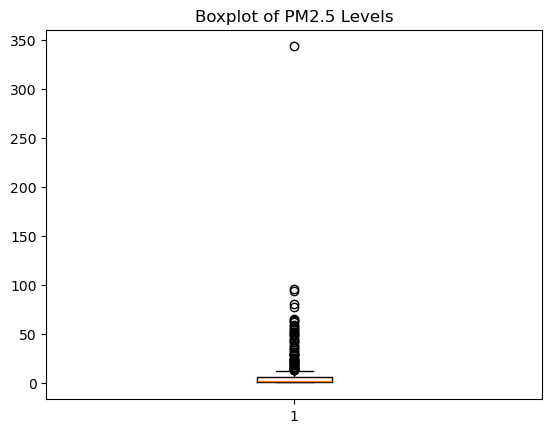

In [11]:
# Box plot for PM2.5
fig1, ax1 = plt.subplots()
ax1.set_title('Boxplot of PM2.5 Levels')
ax1.boxplot(data['PM2.5'])
plt.show()

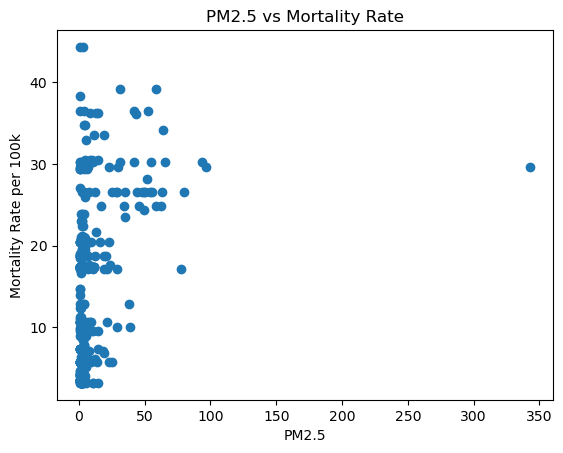

In [11]:
# Scatter plot between PM2.5 and Mortality Rate
plt.scatter(data['PM2.5'], data['MortalityRate_per_100k'])
plt.title('PM2.5 vs Mortality Rate')
plt.xlabel('PM2.5')
plt.ylabel('Mortality Rate per 100k')
plt.show()

In [8]:
z_scores = st.zscore(data['PM2.5'])
outliers = data[(z_scores > 3) | (z_scores < -3)]
print(outliers)

        City Country  PM2.5   PM10   NO2     O3   SO2      CO   NH3  \
57   bushehr      IR   77.3  137.1  12.5   97.3   5.5   534.1   0.6   
107     fada      NG   96.3  128.2  12.2    0.0   5.0  2082.8   9.6   
113   fuling      CN   80.2   84.6   8.9  107.3   8.9   814.4   2.1   
142   howrah      IN   93.4  120.3  31.5   16.4  25.8  1215.0   8.2   
196    lagos      NG  343.2  434.7  19.2    0.0   6.6  5020.1  12.4   

     MortalityRate_per_100k  
57                     17.1  
107                    29.6  
113                    26.6  
142                    30.2  
196                    29.6  


In [9]:
print(len(outliers))

5


In [10]:
from scipy.stats import pearsonr

# Correlation between PM2.5 and Mortality Rate
corr, p_value = pearsonr(data['PM2.5'], data['MortalityRate_per_100k'])
print(f"Correlation: {corr}, P-value: {p_value}")

Correlation: 0.3479249145194997, P-value: 9.088147738151992e-13


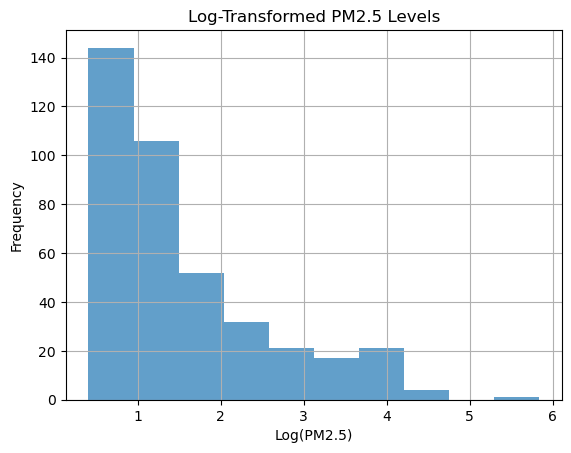

In [12]:
import numpy as np

# Apply log transformation (adding 1 to avoid log(0)) **For this part I asked chatGPT because I was not sure about the result. Golnaz**
data['log_PM2.5'] = np.log1p(data['PM2.5'])

# Plot histogram for log-transformed data
data['log_PM2.5'].hist(bins=10, alpha=0.7)
plt.title('Log-Transformed PM2.5 Levels')
plt.xlabel('Log(PM2.5)')
plt.ylabel('Frequency')
plt.show()


In [13]:
# Test the normality of the log-transformed data
normal_test = st.normaltest(data['log_PM2.5'])
print(normal_test)

NormaltestResult(statistic=70.73653811275355, pvalue=4.3627056705454576e-16)


In [14]:
corr, p_value = st.pearsonr(data['log_PM2.5'], data['MortalityRate_per_100k'])
print(f"Correlation: {corr}, P-value: {p_value}")


Correlation: 0.42235132171968115, P-value: 1.1941173166885924e-18


A correlation of 0.42 indicates a moderate positive relationship between log-transformed PM2.5 levels and mortality rate. This suggests that, as PM2.5 levels increase (even after log transformation), there tends to be an increase in the mortality rate. However, the strength of the correlation is not extremely high, meaning other factors are likely influencing mortality rates as well.

Also the p-value is extremely small (far below the threshold of 0.05), which means that the relationship between log(PM2.5) and mortality rate is statistically significant. We can confidently reject the null hypothesis and conclude that there is a statistically significant correlation between PM2.5 levels and mortality rates.

In [17]:
# Calculate mean, median, mode, variance, and standard deviation for PM10 column
mean_pm10 = data['PM10'].mean()
median_pm10 = data['PM10'].median()
mode_pm10 = data['PM10'].mode()[0] 
variance_pm10 = data['PM10'].var()
std_dev_pm10 = data['PM10'].std()

print(f"Mean PM10: {mean_pm10}, Median PM10: {median_pm10}, Mode PM10: {mode_pm10}, Variance PM10: {variance_pm10}, Standard Deviation PM10: {std_dev_pm10}")


Mean PM10: 17.507035175879395, Median PM10: 4.75, Mode PM10: 0.5, Variance PM10: 1835.7352652430923, Standard Deviation PM10: 42.845481269826955


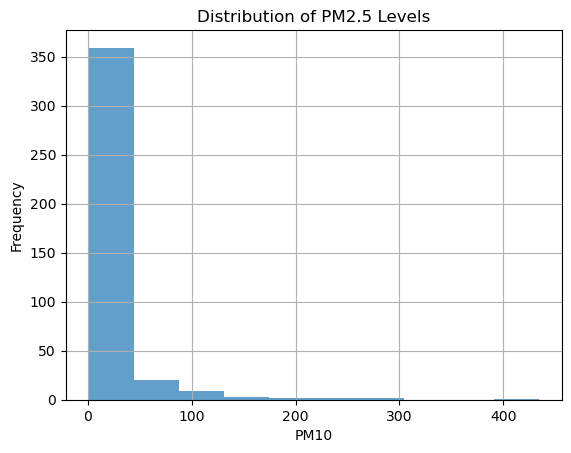

NormaltestResult(statistic=452.27081454575614, pvalue=6.175049715238869e-99)


In [18]:
# Plot a histogram for PM10
data['PM10'].hist(bins=10, alpha=0.7)
plt.title('Distribution of PM2.5 Levels')
plt.xlabel('PM10')
plt.ylabel('Frequency')
plt.show()
print(st.normaltest(data["PM10"]))

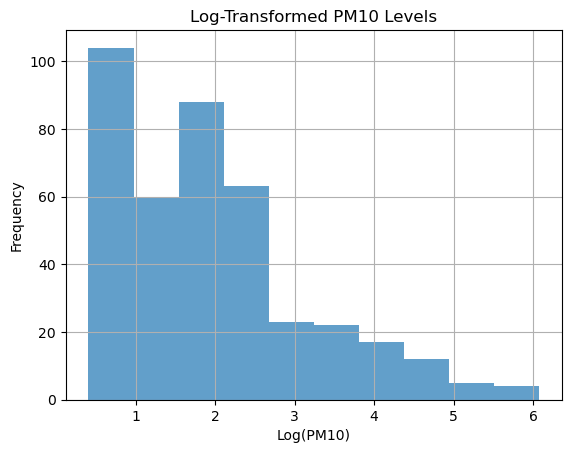

In [19]:
# Apply log transformation (adding 1 to avoid log(0)) **For this part I asked chatGPT because I was not sure about the result. Golnaz**
data['log_PM10'] = np.log1p(data['PM10'])

# Plot histogram for log-transformed data
data['log_PM10'].hist(bins=10, alpha=0.7)
plt.title('Log-Transformed PM10 Levels')
plt.xlabel('Log(PM10)')
plt.ylabel('Frequency')
plt.show()

In [20]:
# Test the normality of the log-transformed data
normal_test = st.normaltest(data['log_PM10'])
print(normal_test)

NormaltestResult(statistic=47.29702225786913, pvalue=5.3651530008078053e-11)


In [21]:
corr, p_value = st.pearsonr(data['log_PM10'], data['MortalityRate_per_100k'])
print(f"Correlation: {corr}, P-value: {p_value}")

Correlation: 0.38393327125682997, P-value: 1.9932397137394757e-15


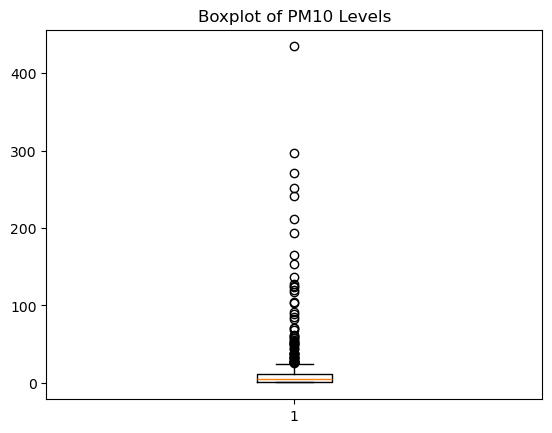

In [24]:
# Box plot for PM10
fig1, ax1 = plt.subplots()
ax1.set_title('Boxplot of PM10 Levels')
ax1.boxplot(data['PM10'])
plt.show()

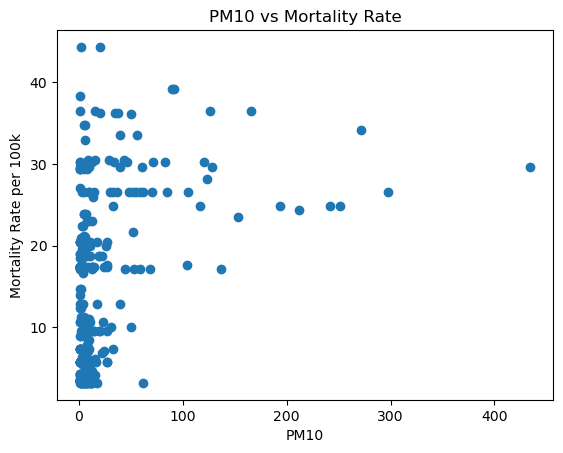

In [25]:
# Scatter plot between PM10 and Mortality Rate
plt.scatter(data['PM10'], data['MortalityRate_per_100k'])
plt.title('PM10 vs Mortality Rate')
plt.xlabel('PM10')
plt.ylabel('Mortality Rate per 100k')
plt.show()

In [26]:
z_scores = st.zscore(data['PM10'])
outliers = data[(z_scores > 3) | (z_scores < -3)]
print(outliers)

             City Country  PM2.5   PM10   NO2    O3  SO2      CO   NH3  \
5        alaghsas      NE   63.9  271.8   0.0  53.6  0.0   196.9   0.0   
23           ataq      YE   42.1  165.7   1.0  55.8  1.1   203.6   0.2   
129          hami      CN   54.4  297.4   3.4  68.0  1.1   208.6   1.5   
166         kayar      SN   35.3  153.3   3.8  87.3  3.9   413.9   3.1   
189         kutum      SD   45.3  193.7   0.1  61.5  0.2   171.9   0.0   
196         lagos      NG  343.2  434.7  19.2   0.0  6.6  5020.1  12.4   
318        shendi      SD   58.6  241.4   0.3  61.5  0.7   188.6   0.2   
339     taoudenni      ML   49.4  211.9   0.0  43.3  0.0   198.6   0.0   
360  umm kaddadah      SD   62.3  251.6   0.1  55.1  0.3   175.2   0.0   

     MortalityRate_per_100k  log_PM2.5  log_PM10  
5                      34.1   4.172848  5.608739  
23                     36.5   3.763523  5.116196  
129                    26.6   4.014580  5.698435  
166                    23.5   3.591818  5.038899  
189 

In [27]:
print(len(outliers))

9


In [28]:
# Correlation between PM10 and Mortality Rate
corr, p_value = pearsonr(data['PM10'], data['MortalityRate_per_100k'])
print(f"Correlation: {corr}, P-value: {p_value}")

Correlation: 0.37451934156916955, P-value: 1.0644194820719793e-14


The correlation between PM10 and mortality rate is around 0.38. This indicates a moderate positive relationship: as PM10 levels increase, the mortality rate tends to increase as well. However, this is not a very strong correlation, meaning that PM10 contributes to increased mortality but is not the only factor at play.

The p-value is very small, indicating that the correlation between PM10 levels and mortality is statistically significant. This suggests that the relationship is unlikely to have occurred by chance and there is strong evidence that higher PM10 levels contribute to higher mortality rates.

In [29]:
# Calculate mean, median, mode, variance, and standard deviation for NO2 column
mean_no2 = data['NO2'].mean()
median_no2 = data['NO2'].median()
mode_no2 = data['NO2'].mode()[0] 
variance_no2 = data['NO2'].var()
std_dev_no2 = data['NO2'].std()

print(f"Mean NO2: {mean_no2}, Median NO2: {median_no2}, Mode NO2: {mode_no2}, Variance NO2: {variance_no2}, Standard Deviation NO2: {std_dev_no2}")


Mean NO2: 2.967085427135679, Median NO2: 0.8, Mode NO2: 0.2, Variance NO2: 40.85964438059312, Standard Deviation NO2: 6.392154908995332


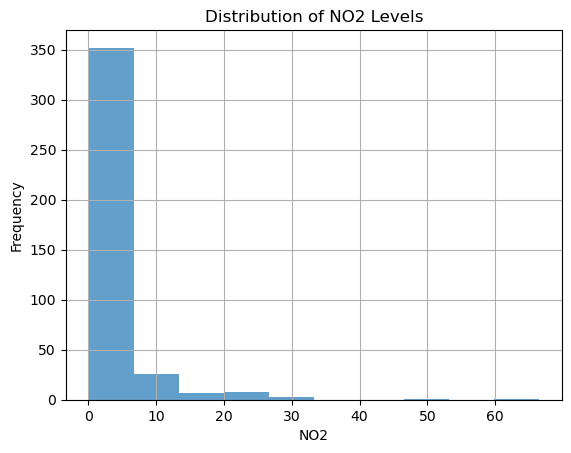

NormaltestResult(statistic=431.5651734941323, pvalue=1.935589622186714e-94)


In [30]:
# Plot a histogram for NO2
data['NO2'].hist(bins=10, alpha=0.7)
plt.title('Distribution of NO2 Levels')
plt.xlabel('NO2')
plt.ylabel('Frequency')
plt.show()
print(st.normaltest(data["NO2"]))

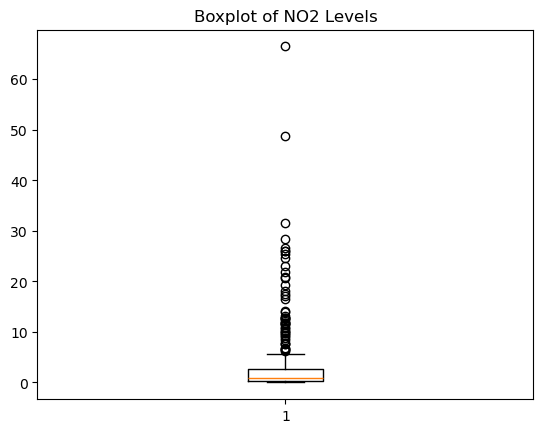

In [31]:
# Box plot for NO2
fig1, ax1 = plt.subplots()
ax1.set_title('Boxplot of NO2 Levels')
ax1.boxplot(data['NO2'])
plt.show()

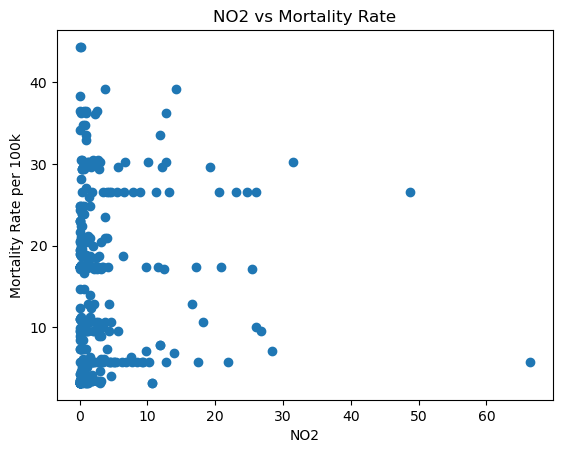

In [32]:
# Scatter plot between NO2 and Mortality Rate
plt.scatter(data['NO2'], data['MortalityRate_per_100k'])
plt.title('NO2 vs Mortality Rate')
plt.xlabel('NO2')
plt.ylabel('Mortality Rate per 100k')
plt.show()

In [33]:
z_scores = st.zscore(data['NO2'])
outliers = data[(z_scores > 3) | (z_scores < -3)]
print(outliers)

          City Country  PM2.5   PM10   NO2    O3   SO2      CO   NH3  \
28         bam      IR   18.9   52.6  25.4  66.5   3.1   327.1   0.8   
63      callao      PE   14.8   27.1  26.7  22.9  16.9   480.6   3.4   
130   hamilton      US   23.0   27.2  66.5   0.1   1.2   680.9   1.4   
132   hancheng      CN   44.2   48.5  23.0  21.6   7.9   734.3   2.3   
142     howrah      IN   93.4  120.3  31.5  16.4  25.8  1215.0   8.2   
143   huangmei      CN   49.5   54.5  48.7  22.2  13.0  1161.6   0.0   
176   kingston      JM   18.5   24.0  28.4   0.3  11.6  1361.8  10.3   
249  nong khae      TH   38.6   49.9  26.0  44.4   9.4   807.8   2.5   
383     xining      CN   50.2   58.5  26.0  68.7  31.0   433.9   0.1   
390    yueyang      CN   28.9   32.6  24.7  22.4  12.8   701.0   1.1   

     MortalityRate_per_100k  log_PM2.5  log_PM10  
28                     17.1   2.990720  3.981549  
63                      9.6   2.760010  3.335770  
130                     5.7   3.178054  3.339322  
132

In [34]:
print(len(outliers))

10


In [35]:
# Correlation between NO2 and Mortality Rate
corr, p_value = pearsonr(data['NO2'], data['MortalityRate_per_100k'])
print(f"Correlation: {corr}, P-value: {p_value}")

Correlation: 0.09051828013089147, P-value: 0.07125343450243096


The correlation between NO2 levels and mortality rate is very weak (0.09). This suggests that there is little to no linear relationship between NO2 pollution and the mortality rate in this dataset.
A correlation this low implies that changes in NO2 levels are not strongly associated with changes in mortality rates, or at least that the relationship is not linear.

The p-value of 0.0713 is slightly above the common significance threshold of 0.05, meaning the correlation is not statistically significant at the 95% confidence level. In other words, we cannot reject the null hypothesis, which suggests that there is no significant relationship between NO2 levels and mortality rates in this dataset.

In [36]:
# Calculate mean, median, mode, variance, and standard deviation for O3 column
mean_o3 = data['O3'].mean()
median_o3 = data['O3'].median()
mode_o3 = data['O3'].mode()[0] 
variance_o3 = data['O3'].var()
std_dev_o3 = data['O3'].std()

print(f"Mean O3: {mean_o3}, Median O3: {median_o3}, Mode O3: {mode_o3}, Variance O3: {variance_o3}, Standard Deviation O3: {std_dev_o3}")


Mean O3: 50.31457286432161, Median O3: 51.15, Mode O3: 53.6, Variance O3: 613.2214999430404, Standard Deviation O3: 24.763309551492515


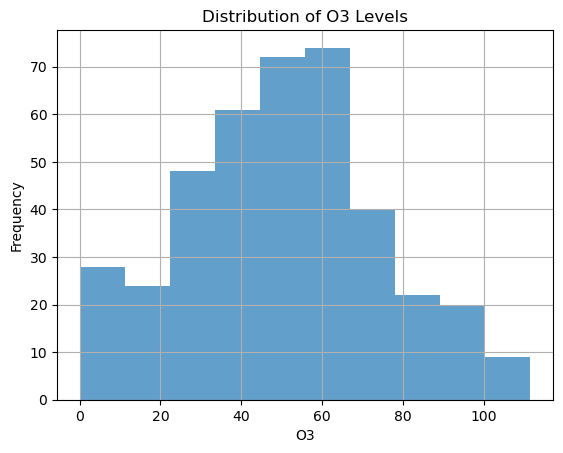

NormaltestResult(statistic=3.0599425717982736, pvalue=0.21654188503226654)


In [37]:
# Plot a histogram for O3
data['O3'].hist(bins=10, alpha=0.7)
plt.title('Distribution of O3 Levels')
plt.xlabel('O3')
plt.ylabel('Frequency')
plt.show()
print(st.normaltest(data["O3"]))

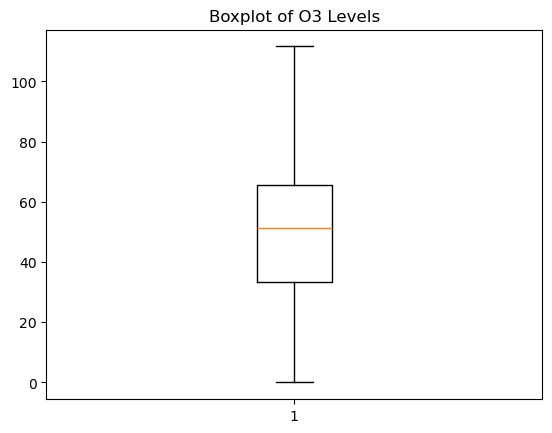

In [38]:
# Box plot for O3
fig1, ax1 = plt.subplots()
ax1.set_title('Boxplot of O3 Levels')
ax1.boxplot(data['O3'])
plt.show()

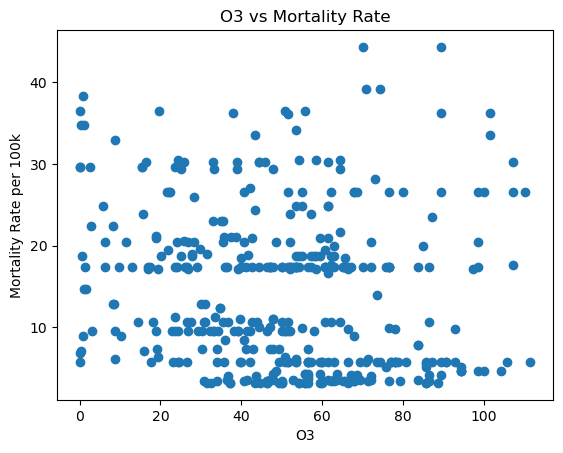

In [39]:
# Scatter plot between O3 and Mortality Rate
plt.scatter(data['O3'], data['MortalityRate_per_100k'])
plt.title('O3 vs Mortality Rate')
plt.xlabel('O3')
plt.ylabel('Mortality Rate per 100k')
plt.show()

In [40]:
z_scores = st.zscore(data['O3'])
outliers = data[(z_scores > 3) | (z_scores < -3)]
print(outliers)

Empty DataFrame
Columns: [City, Country, PM2.5, PM10, NO2, O3, SO2, CO, NH3, MortalityRate_per_100k, log_PM2.5, log_PM10]
Index: []


In [41]:
# Correlation between NO2 and Mortality Rate
corr, p_value = pearsonr(data['O3'], data['MortalityRate_per_100k'])
print(f"Correlation: {corr}, P-value: {p_value}")

Correlation: -0.15162677999134339, P-value: 0.0024214747940304146


In [42]:
# Apply log transformation (adding 1 to avoid log(0))
data['log_O3'] = np.log1p(data['O3'])

# Check the correlation and p-value after log transformation
from scipy.stats import pearsonr
corr, p_value = pearsonr(data['log_O3'], data['MortalityRate_per_100k'])

print(f"Correlation (log-transformed O3): {corr}, P-value: {p_value}")


Correlation (log-transformed O3): -0.19532640656148764, P-value: 8.769386784431127e-05


This negative correlation, suggests a weak negative relationship between O3 levels and the mortality rate. This means that as O3 levels increase, there is a slight decrease in the mortality rate, but the relationship is not strong.

The p-value of 0.0024 is much lower than the significance threshold of 0.05, which means that the correlation between O3 and mortality is statistically significant. Even though the correlation is weak, the result is unlikely to have occurred by random chance, and we can be reasonably confident that there is a real, albeit weak, relationship between O3 and mortality.

In [43]:
# Calculate mean, median, mode, variance, and standard deviation for SO2 column
mean_so2 = data['SO2'].mean()
median_so2 = data['SO2'].median()
mode_so2 = data['SO2'].mode()[0] 
variance_so2 = data['SO2'].var()
std_dev_so2 = data['SO2'].std()

print(f"Mean SO2: {mean_so2}, Median SO2: {median_so2}, Mode SO2: {mode_so2}, Variance SO2: {variance_so2}, Standard Deviation SO2: {std_dev_so2}")


Mean SO2: 1.5035175879396983, Median SO2: 0.3, Mode SO2: 0.1, Variance SO2: 13.535755857372514, Standard Deviation SO2: 3.6790971524781066


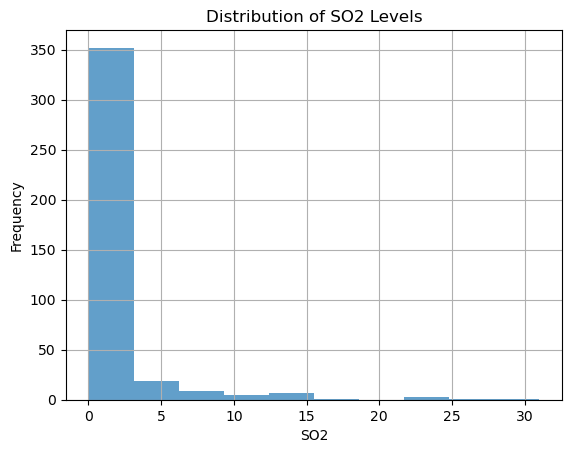

NormaltestResult(statistic=391.67622458645263, pvalue=8.883589552952e-86)


In [44]:
# Plot a histogram for SO2
data['SO2'].hist(bins=10, alpha=0.7)
plt.title('Distribution of SO2 Levels')
plt.xlabel('SO2')
plt.ylabel('Frequency')
plt.show()
print(st.normaltest(data["SO2"]))

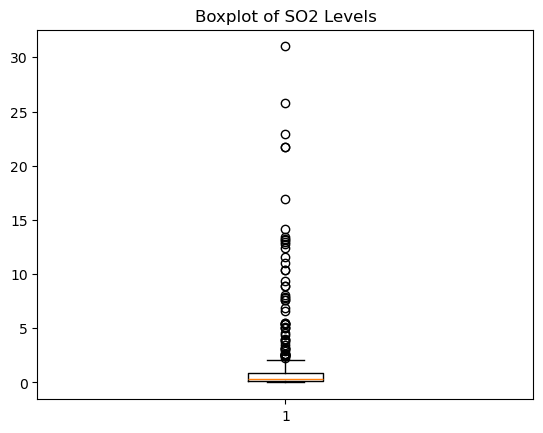

In [45]:
# Box plot for SO2
fig1, ax1 = plt.subplots()
ax1.set_title('Boxplot of SO2 Levels')
ax1.boxplot(data['SO2'])
plt.show()

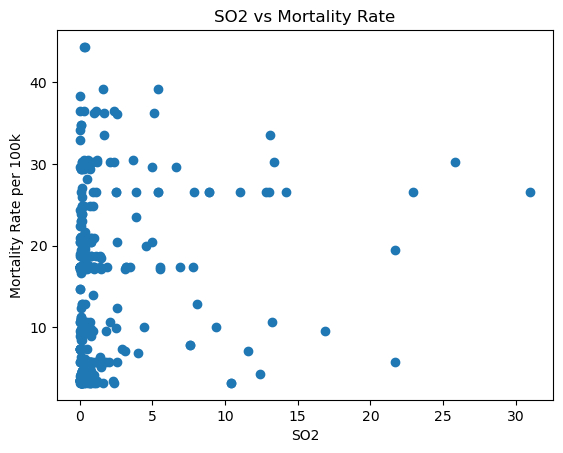

In [46]:
# Scatter plot between SO2 and Mortality Rate
plt.scatter(data['SO2'], data['MortalityRate_per_100k'])
plt.title('SO2 vs Mortality Rate')
plt.xlabel('SO2')
plt.ylabel('Mortality Rate per 100k')
plt.show()

In [48]:
z_scores = st.zscore(data['SO2'])
outliers = data[(z_scores > 3) | (z_scores < -3)]
print(outliers)

                       City Country  PM2.5   PM10   NO2     O3   SO2      CO  \
63                   callao      PE   14.8   27.1  26.7   22.9  16.9   480.6   
78   ciudad lazaro cardenas      MX   21.2   23.2  18.2   31.1  13.2   514.0   
126                 guigang      CN   63.1   70.6  20.6   51.5  22.9   413.9   
140                holualoa      US   24.9   27.2   1.0   69.4  21.7   203.6   
142                  howrah      IN   93.4  120.3  31.5   16.4  25.8  1215.0   
143                huangmei      CN   49.5   54.5  48.7   22.2  13.0  1161.6   
153                 isangel      VU    4.4    5.8   0.0   60.8  21.7   227.0   
157              jharsuguda      IN   41.8   46.2  10.1   45.8  13.4   447.3   
222                  medina      SA   18.9   56.0  11.8   43.3  13.1   208.6   
291                 qingdao      CN   25.4   29.5  13.2  100.1  14.2   447.3   
383                  xining      CN   50.2   58.5  26.0   68.7  31.0   433.9   
390                 yueyang      CN   28

In [50]:
# Correlation between SO2 and Mortality Rate
corr, p_value = pearsonr(data['SO2'], data['MortalityRate_per_100k'])
print(f"Correlation: {corr}, P-value: {p_value}")

Correlation: 0.18246459860790082, P-value: 0.0002527327340614179


In [51]:
# Calculate mean, median, mode, variance, and standard deviation for CO column
mean_co = data['CO'].mean()
median_co = data['CO'].median()
mode_co = data['CO'].mode()[0] 
variance_co = data['CO'].var()
std_dev_co = data['CO'].std()

print(f"Mean CO: {mean_co}, Median CO: {median_co}, Mode CO: {mode_co}, Variance CO: {variance_co}, Standard Deviation CO: {std_dev_co}")


Mean CO: 293.9821608040201, Median CO: 230.3, Mode CO: 223.6, Variance CO: 85690.45094040738, Standard Deviation CO: 292.7293134286476


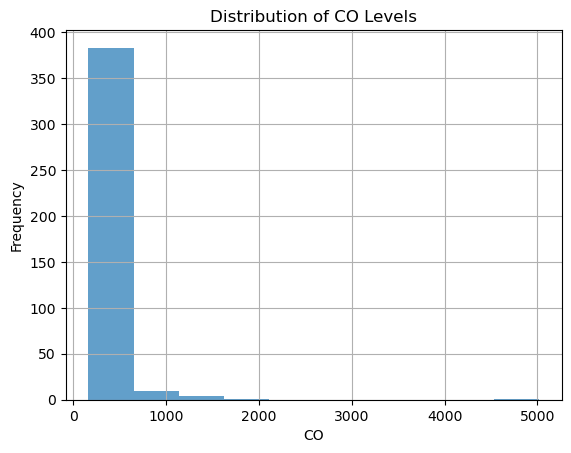

NormaltestResult(statistic=740.743185794012, pvalue=1.4114352225627102e-161)


In [54]:
# Plot a histogram for CO
data['CO'].hist(bins=10, alpha=0.7)
plt.title('Distribution of CO Levels')
plt.xlabel('CO')
plt.ylabel('Frequency')
plt.show()
print(st.normaltest(data["CO"]))

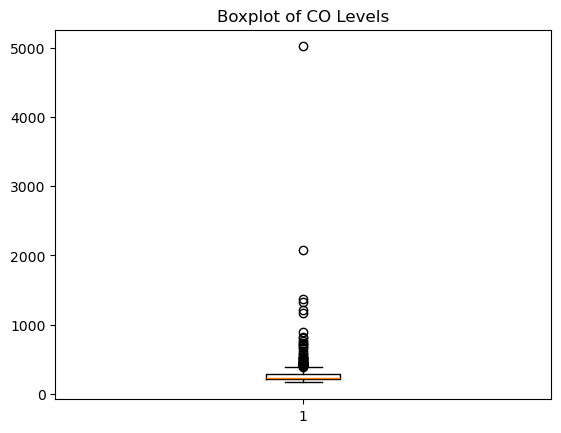

In [55]:
# Box plot for CO
fig1, ax1 = plt.subplots()
ax1.set_title('Boxplot of CO Levels')
ax1.boxplot(data['CO'])
plt.show()

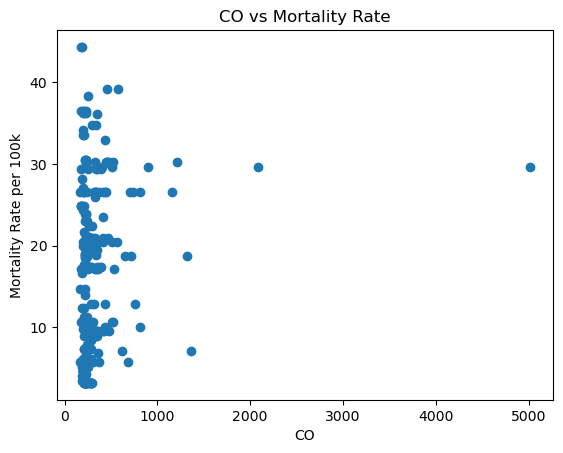

In [56]:
# Scatter plot between CO and Mortality Rate
plt.scatter(data['CO'], data['MortalityRate_per_100k'])
plt.title('CO vs Mortality Rate')
plt.xlabel('CO')
plt.ylabel('Mortality Rate per 100k')
plt.show()

In [57]:
z_scores = st.zscore(data['CO'])
outliers = data[(z_scores > 3) | (z_scores < -3)]
print(outliers)

           City Country  PM2.5   PM10   NO2    O3   SO2      CO   NH3  \
107        fada      NG   96.3  128.2  12.2   0.0   5.0  2082.8   9.6   
142      howrah      IN   93.4  120.3  31.5  16.4  25.8  1215.0   8.2   
176    kingston      JM   18.5   24.0  28.4   0.3  11.6  1361.8  10.3   
196       lagos      NG  343.2  434.7  19.2   0.0   6.6  5020.1  12.4   
311  santa cruz      BO   20.8   21.7   6.4  25.0   0.5  1321.8   1.3   

     MortalityRate_per_100k  log_PM2.5  log_PM10    log_O3  
107                    29.6   4.577799  4.861362  0.000000  
142                    30.2   4.547541  4.798267  2.856470  
176                     7.1   2.970414  3.218876  0.262364  
196                    29.6   5.841223  6.076954  0.000000  
311                    18.7   3.081910  3.122365  3.258097  


In [58]:
print(len(outliers))

5


In [59]:
# Correlation between CO and Mortality Rate
corr, p_value = pearsonr(data['CO'], data['MortalityRate_per_100k'])
print(f"Correlation: {corr}, P-value: {p_value}")

Correlation: 0.20050233455676228, P-value: 5.615570521635335e-05


A correlation of 0.2005 suggests a weak positive relationship between CO (carbon monoxide) levels and mortality rate. This means that as CO levels increase, there is a slight increase in the mortality rate, but the relationship is not strong. While this correlation is stronger than some of the other pollutants like NO2 or O3, it still indicates that CO alone is not a major factor driving mortality rates in your dataset.


The p-value is very small (0.0000562), indicating that the correlation between CO levels and mortality is statistically significant. This means the relationship is unlikely to have occurred by chance, and there is evidence of a genuine association between CO levels and mortality.

In [60]:
# Calculate mean, median, mode, variance, and standard deviation for NH3 column
mean_nh3 = data['NH3'].mean()
median_nh3 = data['NH3'].median()
mode_nh3 = data['NH3'].mode()[0] 
variance_nh3 = data['NH3'].var()
std_dev_nh3 = data['NH3'].std()

print(f"Mean NH3: {mean_nh3}, Median NH3: {median_nh3}, Mode NH3: {mode_nh3}, Variance NH3: {variance_nh3}, Standard Deviation NH3: {std_dev_nh3}")


Mean NH3: 0.8851758793969848, Median NH3: 0.2, Mode NH3: 0.0, Variance NH3: 6.023381707023775, Standard Deviation NH3: 2.4542578729676667


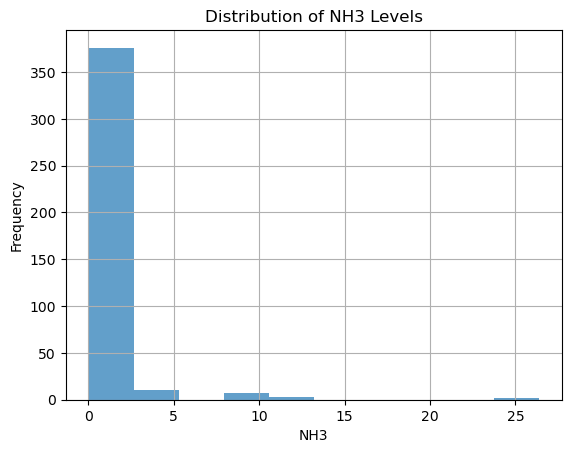

NormaltestResult(statistic=530.9356617301897, pvalue=5.114296852511917e-116)


In [61]:
# Plot a histogram for NH3
data['NH3'].hist(bins=10, alpha=0.7)
plt.title('Distribution of NH3 Levels')
plt.xlabel('NH3')
plt.ylabel('Frequency')
plt.show()
print(st.normaltest(data["NH3"]))

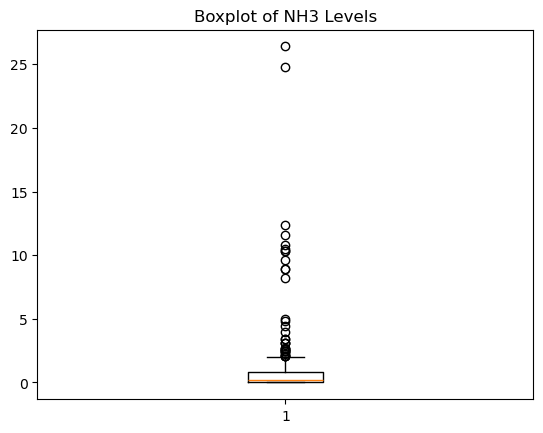

In [62]:
# Box plot for NH3
fig1, ax1 = plt.subplots()
ax1.set_title('Boxplot of NH3 Levels')
ax1.boxplot(data['NH3'])
plt.show()

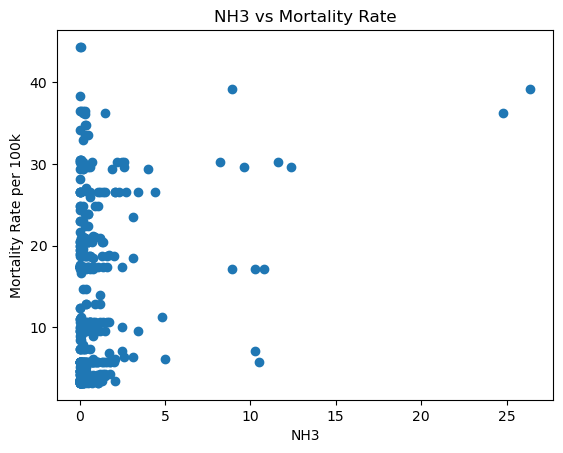

In [63]:
# Scatter plot between NH3 and Mortality Rate
plt.scatter(data['NH3'], data['MortalityRate_per_100k'])
plt.title('NH3 vs Mortality Rate')
plt.xlabel('NH3')
plt.ylabel('Mortality Rate per 100k')
plt.show()

In [64]:
z_scores = st.zscore(data['NH3'])
outliers = data[(z_scores > 3) | (z_scores < -3)]
print(outliers)

              City Country  PM2.5   PM10   NO2    O3   SO2      CO   NH3  \
55            bure      ET   21.5   44.0   3.2  39.3   1.0   360.5  10.3   
93          dadhar      PK   31.6   91.8  14.2  74.4   1.6   454.0   8.9   
95     debre tabor      ET   28.6   58.4   2.6  58.6   1.5   343.8  10.8   
107           fada      NG   96.3  128.2  12.2   0.0   5.0  2082.8   9.6   
131     hanceville      US    3.1    8.9   7.7  23.2   0.1   260.4  10.5   
161          jirja      EG   13.0   34.8  12.8  37.9   5.1   233.6  24.8   
174  kibre mengist      ET    6.8   12.7   2.2  17.0   0.5   257.0   8.9   
176       kingston      JM   18.5   24.0  28.4   0.3  11.6  1361.8  10.3   
185        kuchera      IN   54.7   82.8  12.7  61.5   2.4   480.6  11.6   
196          lagos      NG  343.2  434.7  19.2   0.0   6.6  5020.1  12.4   
260       paharpur      PK   58.8   89.4   3.8  70.8   5.4   574.1  26.4   

     MortalityRate_per_100k  log_PM2.5  log_PM10    log_O3  
55                     17.

In [65]:
# Correlation between NH3 and Mortality Rate
corr, p_value = pearsonr(data['NH3'], data['MortalityRate_per_100k'])
print(f"Correlation: {corr}, P-value: {p_value}")

Correlation: 0.22973184135088937, P-value: 3.6425301823591567e-06


The correlation between NH3 (ammonia) levels and mortality rate is 0.2297, which indicates a weak positive correlation. This suggests that higher NH3 levels are associated with slightly higher mortality rates, but the relationship is not very strong. A weak correlation like this means that NH3 might contribute to increased mortality, but other factors likely play a more significant role.

The p-value is extremely small (0.00000364), which indicates that the correlation between NH3 and mortality is statistically significant. This means the relationship is unlikely to have occurred by random chance, and there is evidence of a real association between NH3 and mortality in your dataset.